In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_curve, auc
import pdb

In [2]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [3]:
from sklearn.covariance import ledoit_wolf
from sklearn.manifold import TSNE

In [4]:
cd log

[Errno 2] No such file or directory: 'log'
/home/qudgks/workspace/gpu8/CLAD-master


In [5]:
# from data_util.clinc_150 import clinc_150_Dataset 

In [6]:
cd run_scripts/

/home/byounghan/workspace/NCLAD/NCLAD-tset/CLAD-master/src/run_scripts


In [7]:
# clinc = clinc_150_Dataset()
# text_in = clinc['test_in']
# text_out = clinc['test_out']

In [7]:
cd /home/qudgks/workspace/gpu8/CLAD-master/src/log/

/home/qudgks/workspace/gpu8/CLAD-master/src/log


In [8]:
ls

2022-6-1/   2022-6-11/  2022-6-2/  2022-6-5/  2022-6-8/
2022-6-10/  2022-6-17/  2022-6-3/  2022-6-6/  2022-6-9/


In [9]:
cd /home/qudgks/workspace/gpu8/CLAD-master/src/log/2022-6-17

/home/qudgks/workspace/gpu8/CLAD-master/src/log/2022-6-17


In [11]:
ls

13-12-48/  13-43-58/  13-46-55/  14-14-24/  14-5-9/
13-28-9/   13-46-18/  13-47-36/  14-16-44/  14-6-49/


In [12]:
cd 14-16-44

/home/qudgks/workspace/gpu8/CLAD-master/src/log/2022-6-17/14-16-44


In [13]:
before = {}
after = {}
after["train_emb_a"] = np.load("train_emb.txta.npy")
after["in_emb_a"] = np.load("in_emb.txta.npy")
after["out_emb_a"] = np.load("ood_emb.txta.npy")
labels = np.load("y_label.txta.npy")

Using ledoit-wolf covariance estimator.
0.9992565


<AxesSubplot:title={'center':'Score Distribution'}, xlabel='score', ylabel='Count'>

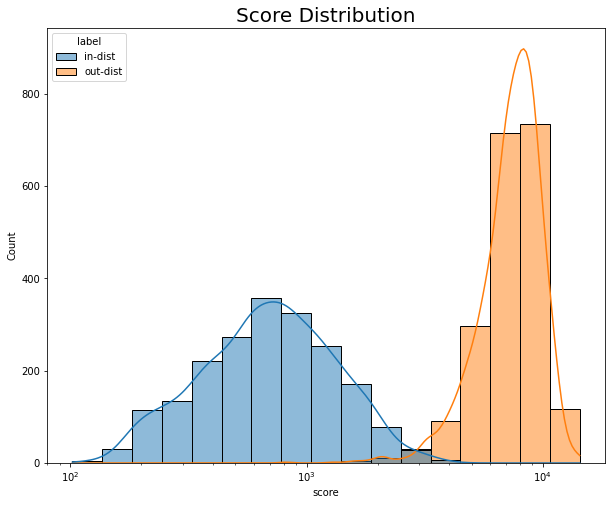

In [14]:
din, dood, dtrain = get_scores_multi_cluster(after["train_emb_a"],after["in_emb_a"],after["out_emb_a"],labels, None,'lw')
score_one = np.append(din,dood)
n = [0 for i in range(len(din))]
N = [1 for i in range(len(dood))]
#n.extend(num)
n.extend(N)
fpr, tpr, thresholds=roc_curve(n, -score_one, pos_label=0)                       
auroc_one = auc(fpr,tpr)

print(auroc_one)

plt.figure(figsize=(10, 8))
plt.title("Score Distribution",fontsize=20)
n = ["in-dist" for i in range(len(din))]
N = ["out-dist" for i in range(len(dood))]
#n.extend(num)
n.extend(N)
data = {'score': score_one, "label": n}
sns.histplot(data = data, x= "score", hue= 'label',kde=True,log_scale=True)


In [15]:
labels

array([24, 79, 77, ..., 62, 62, 72])

In [16]:
feature_ = np.concatenate([after["train_emb_a"],after["in_emb_a"],after["out_emb_a"]])
model = TSNE(n_components= 2,init='pca',perplexity=40)
embed = pd.DataFrame(model.fit_transform(feature_), columns=['x', 'y'])

/home/qudgks/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/qudgks/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [17]:
train = [i for i in labels]
n = ["in-dist" for i in range(len(din))]
N = ["out-dist" for i in range(len(dood))]
embed['label_gt'] = train + n + N

In [18]:
train = ["train" for i in range(len(dtrain))]
n = ["in-dist" for i in range(len(din))]
N = ["out-dist" for i in range(len(dood))]
embed['label_gt'] = train + n + N

In [19]:
embed_in = embed[embed['label_gt']== "in-dist"]
embed_out = embed[embed['label_gt']== "out-dist"]

In [20]:
# embed_in['text'] = text_in
# embed_out['text'] = text_out

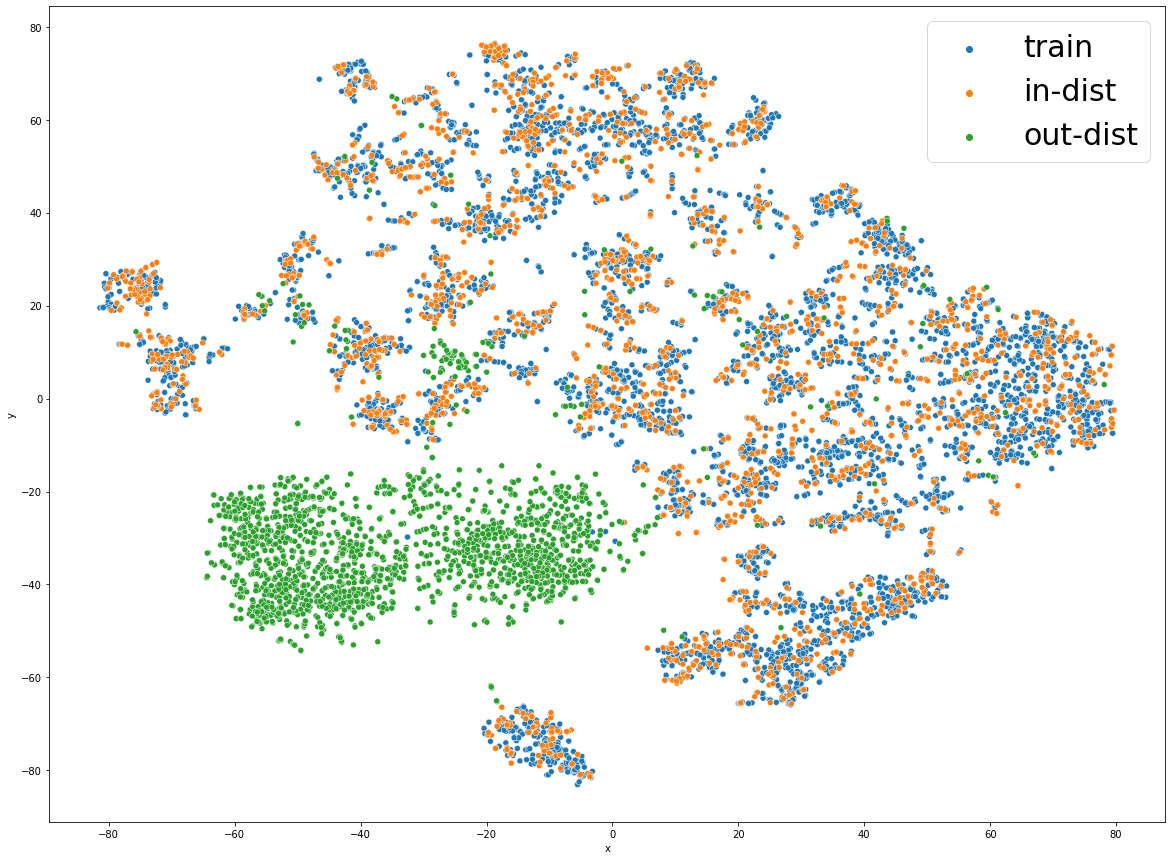

In [24]:
plt.figure(figsize=(20, 15))
fig = sns.scatterplot(data = embed, x='x',y="y", hue="label_gt")
plt.legend(fontsize = 30)

In [22]:
# 어카누 모르겟누
# 최대한 다양한게 만들 필요가 있다. 
# 아니면 out of dist를 제너레이션 하던가~

In [59]:
embed_toy = pd.concat([embed_train,embed_toy])

In [60]:
x_toy, y_toy, z_toy = embed_toy['x'].to_numpy(), embed_toy['y'].to_numpy(), embed_toy['score'].to_numpy()

In [61]:
x_train, y_train, z_train = embed_train['x'].to_numpy(), embed_train['y'].to_numpy(), embed_train['score'].to_numpy()

In [62]:
x_toy, y_toy, z_toy = embed_toy['x'].to_numpy(), embed_toy['y'].to_numpy(), embed_toy['score'].to_numpy()

In [63]:
x_in, y_in, z_in = embed_in['x'].to_numpy(), embed_in['y'].to_numpy(), embed_in['score'].to_numpy()
x_out, y_out, z_out = embed_out['x'].to_numpy(), embed_out['y'].to_numpy(), embed_out['score'].to_numpy()

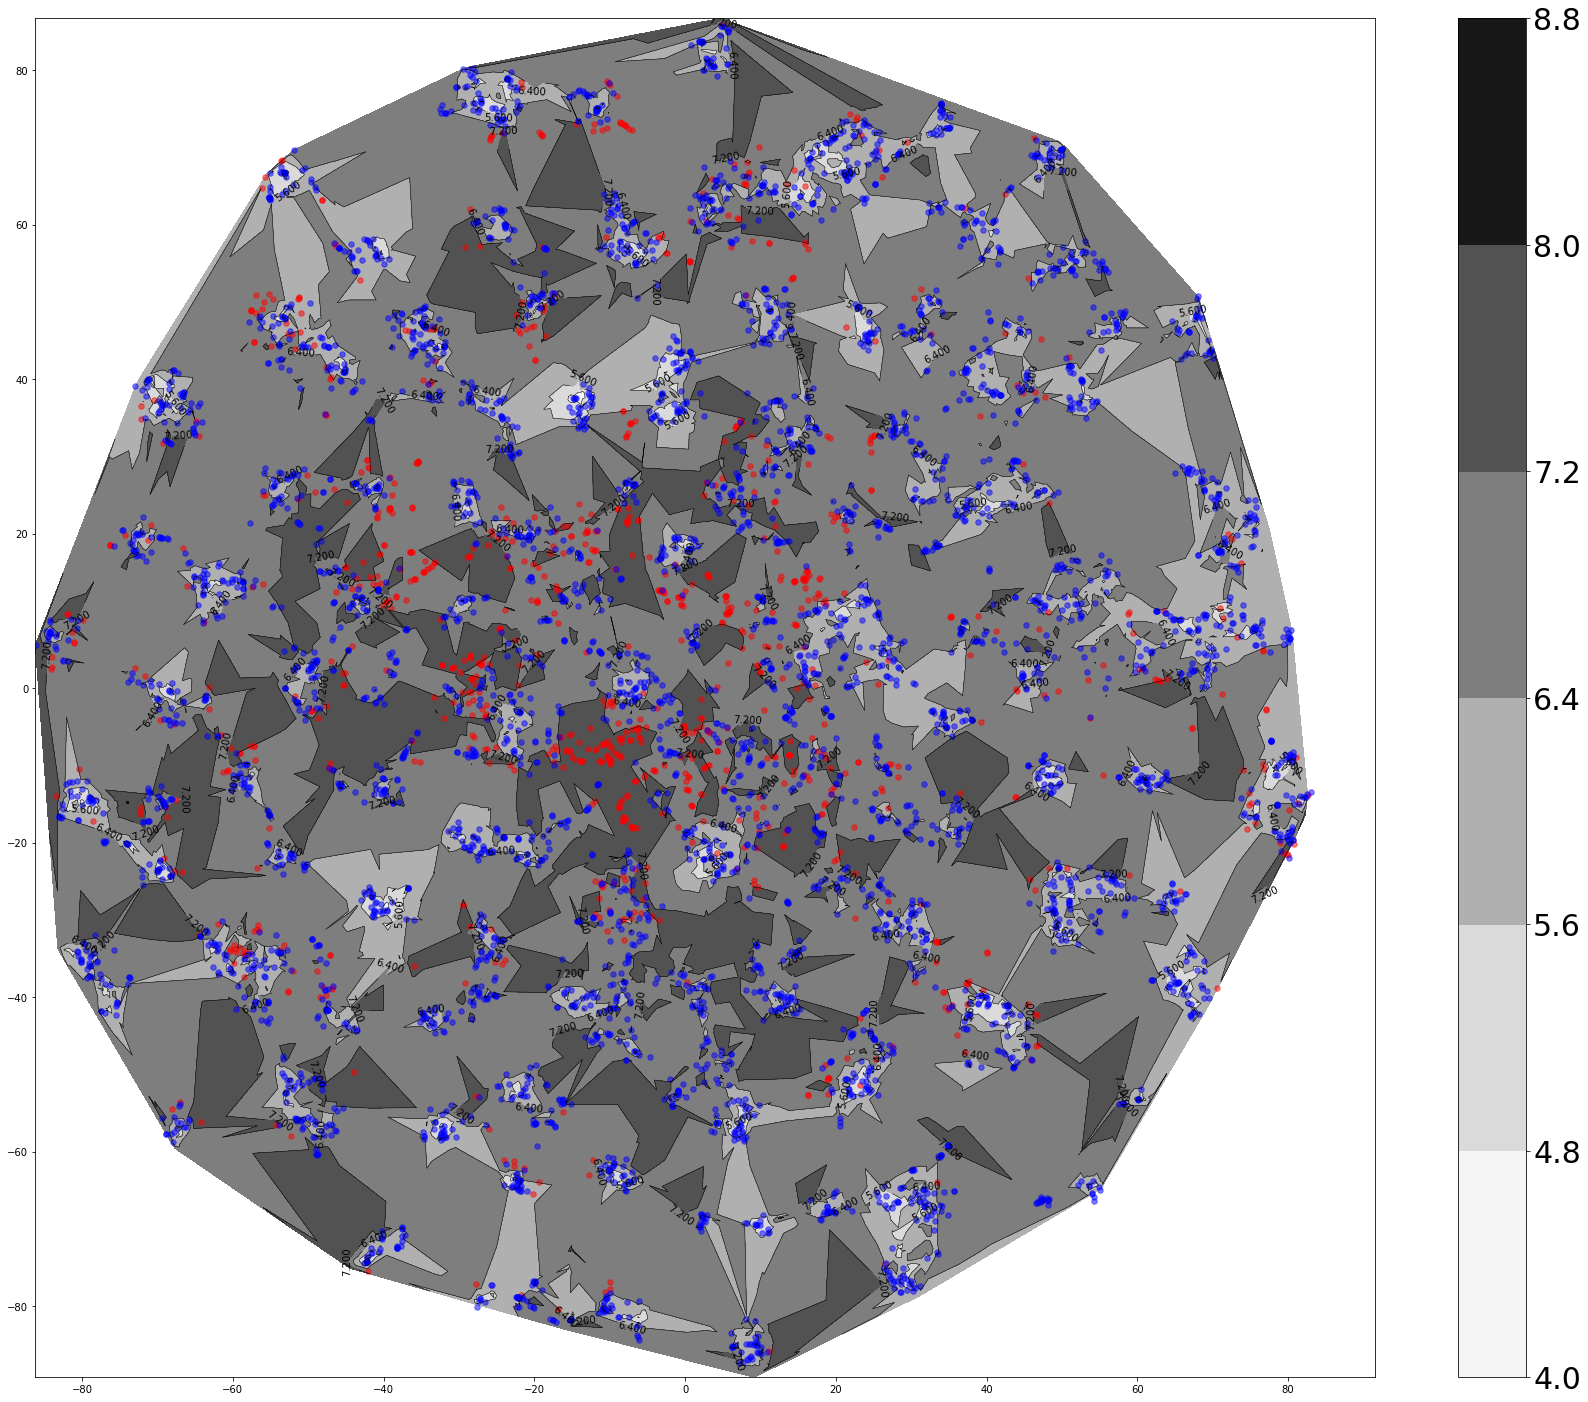

In [81]:
fig1, ax1 = plt.subplots(figsize=(30,25))
cs = ax1.tricontour(x_train, y_train, z_train, levels=5, linewidths=0.5, colors='k')
cs.clabel(fmt='%4.3f',fontsize=10)
cs = ax1.tricontourf(x_train, y_train, z_train,levels =5 ,cmap='Greys')
cbar = plt.colorbar(cs)
tick_font_size = 30
cbar.ax.tick_params(labelsize=tick_font_size)
# cs = ax1.scatter(x_toy, y_toy,c='red',s = 30, alpha=0.5)
# cs = ax1.scatter(x_train, y_train, c='blue', s = 30, alpha=0.5)
cs = ax1.scatter(x_out, y_out,c='red',s = 30, alpha=0.5)
cs = ax1.scatter(x_in, y_in, c='blue', s = 30, alpha=0.5)


In [65]:
embed_test = pd.concat([embed_in,embed_out])

In [66]:
x_test, y_test, z_test = embed_toy['x'].to_numpy(), embed_toy['y'].to_numpy(), embed_toy['score'].to_numpy()

In [69]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

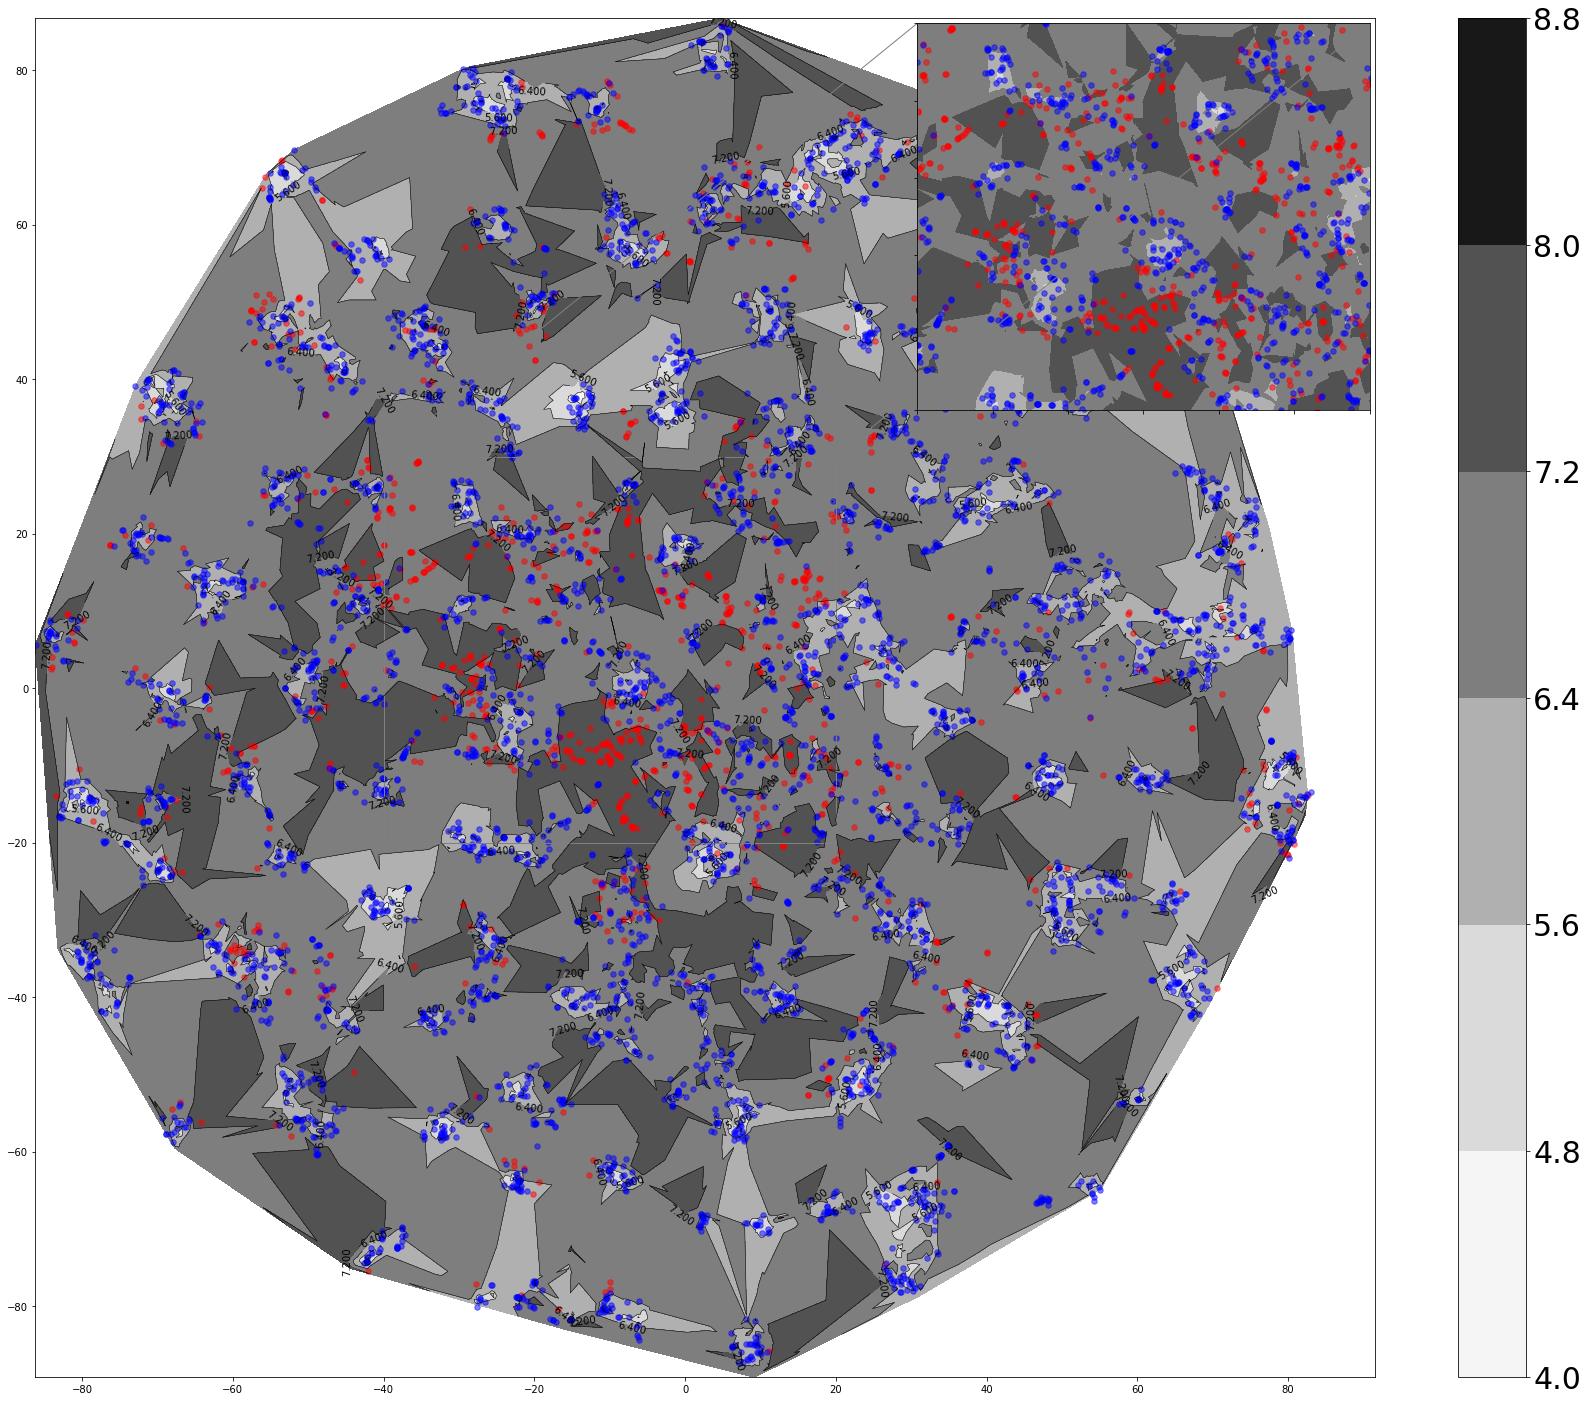

In [80]:
fig1, ax1 = plt.subplots(figsize=(30,25))
cs = ax1.tricontour(x_train, y_train, z_train, levels=5, linewidths=0.5, colors='k')
cs.clabel(fmt='%4.3f',fontsize=10)
cs = ax1.tricontourf(x_test, y_test, z_test,levels =5 ,cmap='Greys')
cbar = plt.colorbar(cs)
tick_font_size = 30
cbar.ax.tick_params(labelsize=tick_font_size)
cs = ax1.scatter(x_out, y_out,c='red',s = 30, alpha=0.5)
cs = ax1.scatter(x_in, y_in, c='blue',s = 30, alpha=0.5)
axins = zoomed_inset_axes(ax1, 1, loc=1)
axins.tricontourf(x_test, y_test, z_test,levels =5 ,cmap='Greys')
axins.scatter(x_out, y_out,c='red',s = 30, alpha=0.5)
axins.scatter(x_in, y_in, c='blue',s = 30, alpha=0.5)
axins.set_xlim(-40, 20)
axins.set_ylim(-20, 30)

plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax1, axins, loc1=1, loc2=2, fc="none", ec="0.5")
plt.draw()
plt.show()

# ==================================

In [70]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1, metric='cosine')

In [71]:
neigh.fit(after["train_emb_a"],labels)

KNeighborsClassifier(metric='cosine', n_neighbors=1)

In [72]:
in_dist=neigh.kneighbors(after["in_emb_a"])

In [73]:
in_dist = in_dist[0]

In [74]:
out_dist = neigh.kneighbors(after["out_emb_a"])

In [75]:
out_dist = out_dist[0]

In [36]:
cov = ledoit_wolf(after["train_emb_a"])[0]
pcov = np.linalg.pinv(cov)
def nn_score(test_in, train_x_, nn):
    nn_scores = []
    for sample, idx in zip(test_in,nn):
        score = np.sum(
                (sample - train_x_[idx[0]]) *
                (pcov.dot(
                    ((sample - train_x_[idx[0]])).T)).T,
                axis=-1,
            )
        nn_scores.append(score)

    return np.array(nn_scores)  

In [65]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
def get_scores_CD(ftrain, ftest, food):

    ftrain_avg = np.mean(ftrain, axis=0, keepdims=True)
    dtrain = [
        1 - cosine_similarity(i.reshape(1, -1), ftrain_avg) for i in ftrain
    ]
    din = [1 - cosine_similarity(i.reshape(1, -1), ftrain_avg) for i in ftest]
    dood = [1 - cosine_similarity(i.reshape(1, -1), ftrain_avg) for i in food]

    return np.array(din).reshape(-1,1), np.array(dood).reshape(-1,1)


#UD
def get_scores_UD(ftrain, ftest, food):

    ftrain_avg = np.mean(ftrain, axis=0, keepdims=True)
    dtrain = [euclidean_distances(i.reshape(1, -1), ftrain_avg) for i in ftest]
    din = [euclidean_distances(i.reshape(1, -1), ftrain_avg) for i in ftest]
    dood = [euclidean_distances(i.reshape(1, -1), ftrain_avg) for i in food]

    return np.array(din).reshape(-1,1), np.array(dood).reshape(-1,1)

In [77]:
a = in_dist
b = out_dist
sco = nn_score(after["in_emb_a"],after["train_emb_a"], a)
sco_ = nn_score(after["out_emb_a"],after["train_emb_a"], b)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [85]:
din, dood = get_scores_CD(after["train_emb_a"],after["in_emb_a"],after["out_emb_a"])

In [87]:
score_one = np.append(new,new_)
#score_one = np.append(in_dist,out_dist)
n = [0 for i in range(len(in_dist))]
N = [1 for i in range(len(out_dist))]
n.extend(N)
fpr, tpr, thresholds=roc_curve(n, -score_one, pos_label=0)                       
auroc_one = auc(fpr,tpr)
auroc_one

0.7972074444444445

In [63]:
score_one

array([ 913.98580256, 1753.79825169, 2199.20846428, ..., 4724.6850942 ,
       3016.76966281,  854.58288311])

<AxesSubplot:xlabel='score', ylabel='Count'>

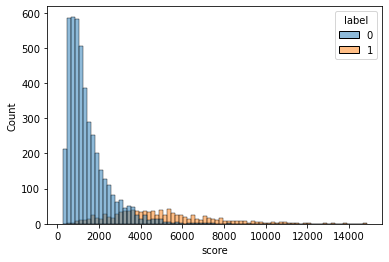

In [64]:
data = {'score': score_one, "label": n}
sns.histplot(data = data, x= "score", hue= 'label')

In [27]:
feature_ = np.concatenate([after["train_emb_a"], after["in_emb_a"],after["out_emb_a"]])

In [28]:
feature = np.concatenate([before["train_emb_b"],before["in_emb_b"],before["out_emb_b"]])

In [230]:
len(after["out_emb_a"])

5775

In [231]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2,perplexity=40)
embed = pd.DataFrame(model.fit_transform(feature_), columns=['x', 'y'])
n = ["train" for i in range(len(after["train_emb_a"]))]
n_ = ["normal" for i in range(len(after["in_emb_a"]))]
N = ["abnormal" for i in range(len(after["out_emb_a"]))]
n.extend(n_)
n.extend(N)
embed['label_gt'] = n

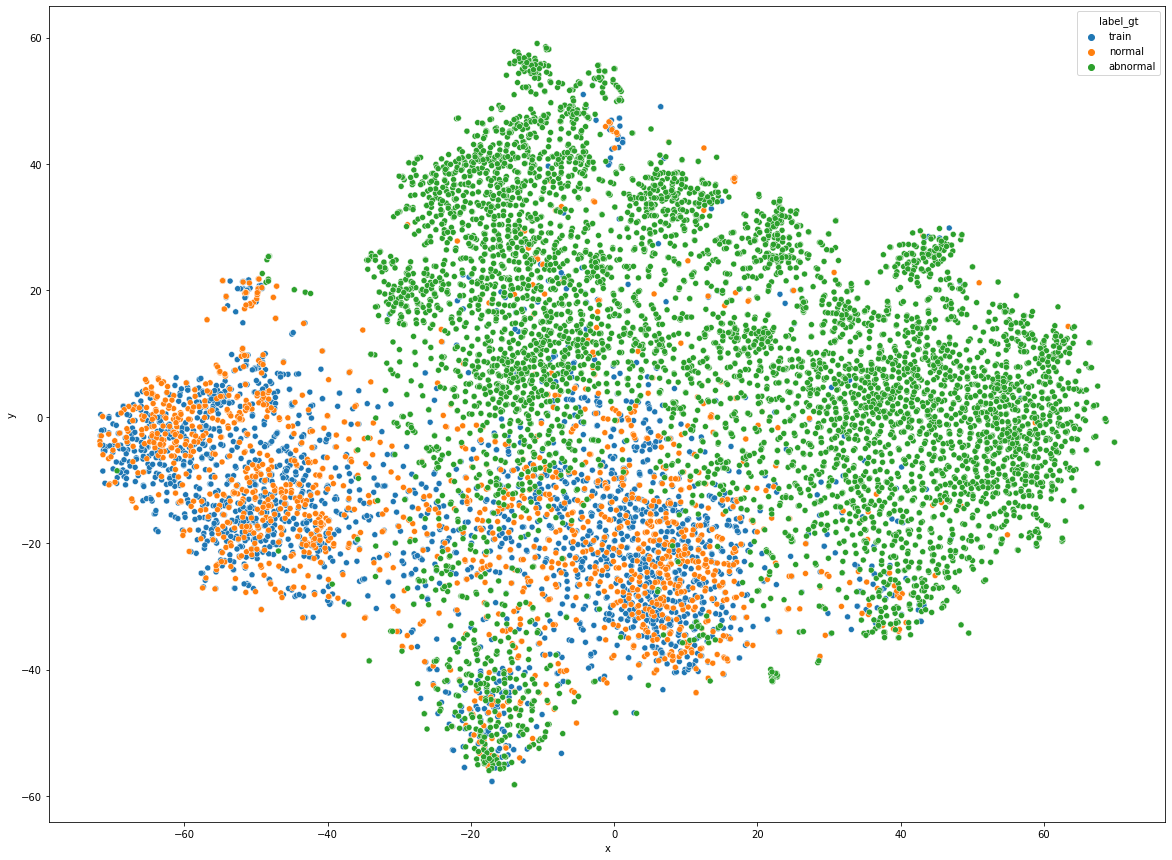

In [232]:
plt.figure(figsize=(20, 15))
fig = sns.scatterplot(data = embed, x='x',y="y", hue="label_gt")

In [186]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2,perplexity=40)
embed = pd.DataFrame(model.fit_transform(feature), columns=['x', 'y'])
embed['label_gt'] = n

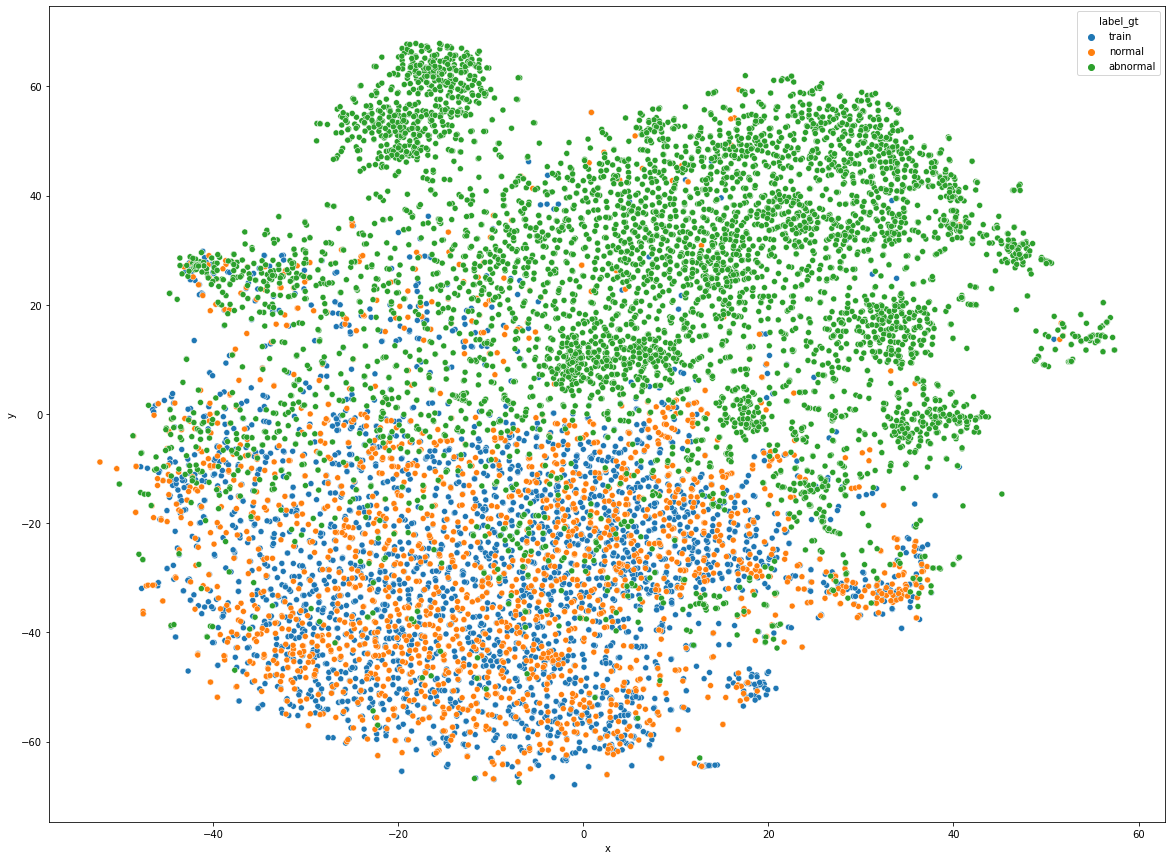

In [187]:
plt.figure(figsize=(20, 15))
fig = sns.scatterplot(data = embed, x='x',y="y", hue="label_gt")

In [5]:
def get_scores_one_cluster(ftrain, ftest, food, shrunkcov=False):
    if shrunkcov:
        print("Using ledoit-wolf covariance estimator.")
        cov = lambda x: ledoit_wolf(x)[0]
    else:
        cov = lambda x: np.cov(x.T, bias=True)

    # ToDO: Simplify these equations
    dtest = np.sum(
        (ftest - np.mean(ftrain, axis=0, keepdims=True))
        * (
            np.linalg.pinv(cov(ftrain)).dot(
                (ftest - np.mean(ftrain, axis=0, keepdims=True)).T
            )
        ).T,
        axis=-1,
    )

    dood = np.sum(
        (food - np.mean(ftrain, axis=0, keepdims=True))
        * (
            np.linalg.pinv(cov(ftrain)).dot(
                (food - np.mean(ftrain, axis=0, keepdims=True)).T
            )
        ).T,
        axis=-1,
    )
    
    dtrain = np.sum(
        (ftrain - np.mean(ftrain, axis=0, keepdims=True))
        * (
            np.linalg.pinv(cov(ftrain)).dot(
                (ftrain - np.mean(ftrain, axis=0, keepdims=True)).T
            )
        ).T,
        axis=-1,
    )
    return dtest, dood, dtrain

In [6]:
def get_scores_multi_cluster(ftrain, ftest, food, ypred,toy = None, shrunkcov=True):
    xc = [ftrain[ypred == i] for i in np.unique(ypred)]
    if shrunkcov =="lw":
        print("Using ledoit-wolf covariance estimator.")
        cov = np.linalg.pinv(ledoit_wolf(ftrain)[0])
    elif shrunkcov == "emp":
        from sklearn.covariance import EmpiricalCovariance
        cov =  np.linalg.pinv(EmpiricalCovariance().fit(ftrain).covariance_)
    elif shrunkcov == "sh":
        print("sh")
        cov = lambda x:  ShrunkCovariance(shrinkage=0.1).fit(x).covariance_
    elif shrunkcov == "osa":
        print("osa")
        cov = lambda x: OAS().fit(x).covariance_
    else:
        print("nor")
        cov = np.linalg.pinv(np.cov(ftrain.T, bias=True))

    toys = None
    
    if isinstance(toy,np.ndarray):

        toys = [
        np.sum(
            (toy - np.mean(x, axis=0, keepdims=True))
            * (
                cov.dot(
                    (toy - np.mean(x, axis=0, keepdims=True)).T
                )
            ).T,
            axis=-1,
        )
        for x in xc
    ]

    dtrain = [
        np.sum(
            (ftrain - np.mean(x, axis=0, keepdims=True))
            * (
                cov.dot(
                    (ftrain - np.mean(x, axis=0, keepdims=True)).T
                )
            ).T,
            axis=-1,
        )
        for x in xc
    ]       
    
    din = [
        np.sum(
            (ftest - np.mean(x, axis=0, keepdims=True))
            * (
                cov.dot(
                    (ftest - np.mean(x, axis=0, keepdims=True)).T
                )
            ).T,
            axis=-1,
        )
        for x in xc
    ]
    dood = [
        np.sum(
            (food - np.mean(x, axis=0, keepdims=True))
            * (
                cov.dot(
                    (food - np.mean(x, axis=0, keepdims=True)).T
                )
            ).T,
            axis=-1,
        )
        for x in xc
    ]
    
    din = np.min(din, axis=0)
    dood = np.min(dood, axis=0)
    dtrain = np.min(dtrain, axis=0)
    toys = np.min(toys, axis=0)
    return din, dood, dtrain

# ================================================

# detection

In [28]:
import os

In [248]:
cd ..

/hdd/log


In [249]:
cd /hdd/log

/hdd/log


In [25]:
def name_normal(path):
    with open(path, "r") as f:
        strings = f.read()
        a = strings.split("dataset name : ")[1]
        name = a.split("classifier")[0]
        b = a.split("normal_class_index_list :")[1]
        normal = b.split("n_hidden_features")[0]
        cc = strings.split("cluster_num=")[1]
        num = cc.split(", cluster_type=")[0]
        normal = normal.strip()
        name = name.strip()
        cc = strings.split("classifier_epochs=")[1]
        epoch = cc.split(",")[0]
        cc = strings.split("cluster_type=")[1]
        cluster_type = cc.split(",")[0]
        cc = strings.split("classifier_type=")[1]
        classifier_type = cc.split(",")[0]        
        cc = strings.split("language_model=")[1]
        LM = cc.split(",")[0]                
        f.close()
        return name, normal, num,cluster_type, epoch, LM ,classifier_type

In [254]:
cd /hdd/log/rostd

/hdd/log/rostd


In [279]:
cd ..

/hdd/log


In [291]:
score_list = []
for date in os.listdir():

    if len(date.split(".")) != 1:
        continue
        
    elif date == '2022-5-20' :
        os.chdir(date)
    else :
        continue

    after = {}
    for time in os.listdir():
        if len(time.split(".")) != 1:
            continue

        else :
            os.chdir(time)
            
        if os.path.exists("train_emb.txta.npy") and os.path.exists("y_label.txta.npy") :
            path_txt = [i for i in os.listdir() if "bert" in i][0]
            name, normal, num, cluster_type, epoch, LM, classifier_type = name_normal(path_txt)
            print(name)
                
            after["train_emb_a"] = np.load("train_emb.txta.npy")
            after["in_emb_a"] = np.load("in_emb.txta.npy")
            after["out_emb_a"] = np.load("ood_emb.txta.npy")
            labels = np.load("y_label.txta.npy")
            din, dood, dtrain = get_scores_multi_cluster(after["train_emb_a"],after["in_emb_a"],after["out_emb_a"], labels ,toy = None, shrunkcov="lw")
            score_dict= metric(din, dood)['maha']
            score_dict["dtrain_var"] = np.var(dtrain)
            score_dict["dtrain_mean"] = sum(dtrain) / len(dtrain)
            score_dict["date"] = date
            score_dict["time"] = time
            score_dict['dataset'] = name
            score_dict['normal'] = normal
            score_dict['cluster'] = num
            score_dict['method'] = cluster_type
            score_dict['method_c'] = classifier_type
            score_dict['epoch'] = epoch
            score_dict['LM'] = LM
            score_list.append(score_dict)
        os.chdir("../")
    os.chdir("../")

snips
Using ledoit-wolf covariance estimator.
snips
Using ledoit-wolf covariance estimator.
snips
Using ledoit-wolf covariance estimator.
snips
Using ledoit-wolf covariance estimator.
snips
Using ledoit-wolf covariance estimator.
snips
Using ledoit-wolf covariance estimator.
snips
Using ledoit-wolf covariance estimator.
snips
Using ledoit-wolf covariance estimator.
snips
Using ledoit-wolf covariance estimator.
snips
Using ledoit-wolf covariance estimator.
snips
Using ledoit-wolf covariance estimator.
snips
Using ledoit-wolf covariance estimator.


In [292]:
df = pd.DataFrame(score_list)
df['sort_time'] = df[['date','time']].apply(lambda x: " ".join(x), axis = 1)
df['sort_time'] = pd.to_datetime(df['sort_time'], format = "%Y-%m-%d %H-%M-%S")
#df = df.sort_values(by = 'dtrain_mean')

In [293]:
df.sort_values('sort_time')

TNR     AUROC     DTACC      AUIN     AUOUT     dtrain_var  \
1   0.459893  0.863850  0.776840  0.943930  0.730920   66957.160442   
3   0.545455  0.912103  0.841537  0.965101  0.805993   92484.680230   
5   0.903743  0.984176  0.937674  0.993444  0.954649  456667.268337   
8   0.449198  0.865414  0.785559  0.945774  0.728785   80639.078040   
0   0.743316  0.957282  0.899740  0.984147  0.874639  288609.896728   
7   0.459893  0.863850  0.776840  0.943930  0.730920   66957.160442   
6   0.545455  0.912260  0.841537  0.965156  0.806489   92523.794774   
10  0.743316  0.957282  0.899740  0.984147  0.874639  288610.274325   
2   0.433155  0.863829  0.783386  0.945142  0.724162   80196.317879   
11  0.459893  0.863850  0.776840  0.943930  0.730920   66957.160442   
9   0.486631  0.891005  0.816420  0.957141  0.759851   79288.817019   
4   0.454545  0.870417  0.785059  0.946885  0.742369   77658.205989   

    dtrain_mean       date     time dataset normal cluster      method  \
1    739.716977  2022-5-20    5-2-1   snips    [0]       1  'DEC_bert'   
3    745.582609  2022-5-20   5-5-54   snips    [0]       5      'SCCL'   
5    734.492235  2022-5-20  5-14-53   snips    [0]       5      'SCCL'   
8    743.002074  2022-5-20  5-28-22   snips    [0]       5  'DEC_bert'   
0    746.030936  2022-5-20  5-32-56   snips    [0]       5  'DEC_bert'   
7    739.716977  2022-5-20   5-49-4   snips    [0]       1  'DEC_bert'   
6    745.615190  2022-5-20  5-52-29   snips    [0]       5      'SCCL'   
10   746.030921  2022-5-20   6-1-31   snips    [0]       5  'DEC_bert'   
2    744.576401  2022-5-20   6-15-9   snips    [0]       1  'DEC_bert'   
11   739.716977  2022-5-20   6-31-0   snips    [0]       1  'DEC_bert'   
9    733.419145  2022-5-20  6-41-16   snips    [0]       1      'SCCL'   
4    746.109050  2022-5-20  6-50-12   snips    [0]       1  'DEC_bert'   

      method_c epoch                   LM           sort_time  
1   'DEC_bert'     0  'bert-base-uncased' 2022-05-20 05:02:01  
3   'DEC_bert'     0  'bert-base-uncased' 2022-05-20 05:05:54  
5   'DEC_bert'     1  'bert-base-uncased' 2022-05-20 05:14:53  
8   'DEC_bert'     0  'bert-base-uncased' 2022-05-20 05:28:22  
0   'DEC_bert'     1  'bert-base-uncased' 2022-05-20 05:32:56  
7   'DEC_bert'     0  'bert-base-uncased' 2022-05-20 05:49:04  
6   'DEC_bert'     0  'bert-base-uncased' 2022-05-20 05:52:29  
10  'DEC_bert'     1  'bert-base-uncased' 2022-05-20 06:01:31  
2   'DEC_bert'     0  'bert-base-uncased' 2022-05-20 06:15:09  
11  'DEC_bert'     0  'bert-base-uncased' 2022-05-20 06:31:00  
9   'DEC_bert'     0  'bert-base-uncased' 2022-05-20 06:41:16  
4   'DEC_bert'     0  'bert-base-uncased' 2022-05-20 06:50:12

In [242]:
df[(df['method'] == "'SCCL'") & (df['LM'] == "'bert-base-uncased'") & (df['epoch'] == 1)]

Empty DataFrame
Columns: [TNR, AUROC, DTACC, AUIN, AUOUT, dtrain_var, dtrain_mean, date, time, dataset, normal, cluster, method, method_c, epoch, LM, sort_time]
Index: []

Text(0.5, 0, 'Cluster #k')

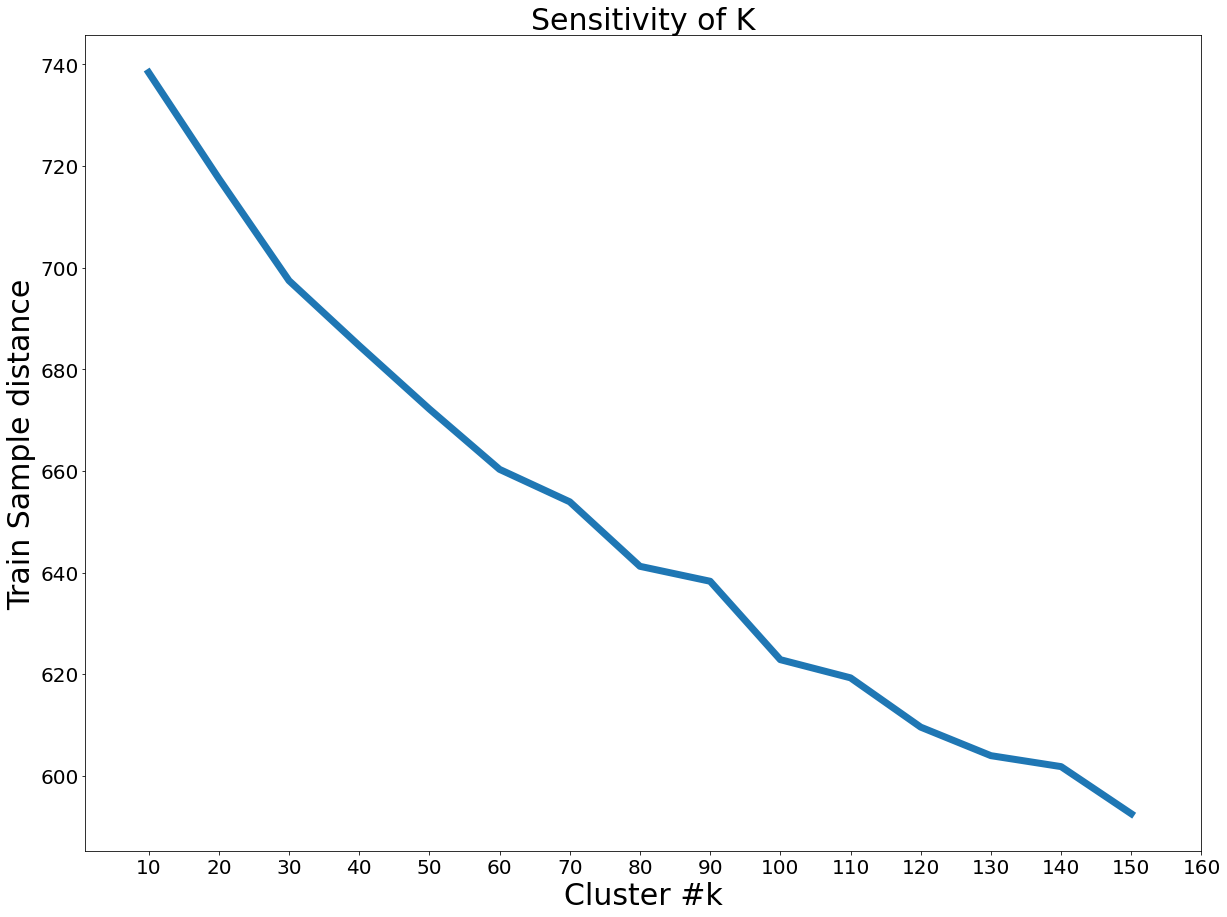

In [416]:
plt.figure(figsize=(20, 15))
sns.lineplot(data=s, x='cluster', y ='dtrain_mean',linewidth=7, dashes=False)
plt.title("Sensitivity of K", fontsize = 30)
plt.xlim((1,21))
plt.xticks(np.arange(10,170,10), fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel("Train Sample distance",fontsize = 30)
plt.xlabel("Cluster #k",fontsize = 30)

In [85]:
df.sort_values(by = 'AUROC', ascending=False)

TNR     AUROC     DTACC      AUIN     AUOUT    dtrain_var  dtrain_mean  \
44  0.9805  0.993055  0.966244  0.994500  0.990586  75591.197192   740.605996   
25  0.9810  0.993039  0.966900  0.994494  0.990552  77263.247437   742.960381   
29  0.9805  0.993036  0.966650  0.994469  0.990629  76477.136847   740.465376   
53  0.9800  0.992898  0.966208  0.994390  0.990390  76002.990073   742.897706   
19  0.9795  0.992887  0.966029  0.994393  0.990356  75734.069836   742.750975   
..     ...       ...       ...       ...       ...           ...          ...   
34  0.6565  0.917871  0.836731  0.920461  0.910910  54633.018729   714.758253   
79  0.6555  0.917406  0.835897  0.920339  0.910093  54171.831938   719.916688   
13  0.6580  0.916883  0.835468  0.919320  0.910272  55289.319937   716.162539   
60  0.6500  0.913123  0.834719  0.914366  0.906977  53172.501463   723.828152   
71  0.6240  0.909419  0.834208  0.912991  0.897674  48791.700545   712.081830   

        date      time dataset normal cluster      method    method_c epoch  \
44  2022-5-9  15-50-13     sst    [0]      19  'DEC_bert'  'DEC_bert'     0   
25  2022-5-9  14-34-44     sst    [0]      10  'DEC_bert'  'DEC_bert'     0   
29  2022-5-9    16-0-4     sst    [0]      20  'DEC_bert'  'DEC_bert'     0   
53  2022-5-9  14-26-28     sst    [0]       9  'DEC_bert'  'DEC_bert'     0   
19  2022-5-9  14-59-40     sst    [0]      13  'DEC_bert'  'DEC_bert'     0   
..       ...       ...     ...    ...     ...         ...         ...   ...   
34  2022-5-9   2-26-22     sst    [0]      19      'SCCL'  'DEC_bert'     0   
79  2022-5-8  23-55-52     sst    [0]       5      'SCCL'  'DEC_bert'     0   
13  2022-5-9    2-4-54     sst    [0]      17      'SCCL'  'DEC_bert'     0   
60  2022-5-8  23-23-56     sst    [0]       2      'SCCL'  'DEC_bert'     0   
71  2022-5-8  23-13-22     sst    [0]       1      'SCCL'  'DEC_bert'     0   

                LM           sort_time  
44  'roberta-base' 2022-05-09 15:50:13  
25  'roberta-base' 2022-05-09 14:34:44  
29  'roberta-base' 2022-05-09 16:00:04  
53  'roberta-base' 2022-05-09 14:26:28  
19  'roberta-base' 2022-05-09 14:59:40  
..             ...                 ...  
34  'roberta-base' 2022-05-09 02:26:22  
79  'roberta-base' 2022-05-08 23:55:52  
13  'roberta-base' 2022-05-09 02:04:54  
60  'roberta-base' 2022-05-08 23:23:56  
71  'roberta-base' 2022-05-08 23:13:22  

[80 rows x 17 columns]

In [121]:
df.sort_values(by = 'dtrain_mean', ascending=True)

TNR     AUROC     DTACC      AUIN     AUOUT    dtrain_var  dtrain_mean  \
71  0.6240  0.909419  0.834208  0.912991  0.897674  48791.700545   712.081830   
32  0.6565  0.919312  0.838481  0.922528  0.911773  54405.070893   714.231730   
0   0.6570  0.918730  0.838028  0.921534  0.911569  54694.305704   714.427741   
34  0.6565  0.917871  0.836731  0.920461  0.910910  54633.018729   714.758253   
7   0.6625  0.918706  0.838505  0.921468  0.911674  54682.429773   716.129792   
..     ...       ...       ...       ...       ...           ...          ...   
3   0.9795  0.992808  0.965972  0.994358  0.990162  76433.228651   744.082613   
36  0.9785  0.992350  0.965018  0.994001  0.989618  76677.306791   744.115279   
24  0.9735  0.992411  0.964662  0.994063  0.989623  76934.204065   744.146989   
31  0.9780  0.992568  0.965613  0.994163  0.989919  75958.805481   744.349431   
2   0.9790  0.992553  0.965532  0.994168  0.989855  76659.811918   744.486714   

        date      time dataset normal cluster      method    method_c epoch  \
71  2022-5-8  23-13-22     sst    [0]       1      'SCCL'  'DEC_bert'     0   
32  2022-5-9   2-37-27     sst    [0]      20      'SCCL'  'DEC_bert'     0   
0   2022-5-9   2-15-38     sst    [0]      18      'SCCL'  'DEC_bert'     0   
34  2022-5-9   2-26-22     sst    [0]      19      'SCCL'  'DEC_bert'     0   
7   2022-5-9    1-54-6     sst    [0]      16      'SCCL'  'DEC_bert'     0   
..       ...       ...     ...    ...     ...         ...         ...   ...   
3   2022-5-9   14-1-48     sst    [0]       6  'DEC_bert'  'DEC_bert'     0   
36  2022-5-9  13-37-25     sst    [0]       3  'DEC_bert'  'DEC_bert'     0   
24  2022-5-9   14-10-5     sst    [0]       7  'DEC_bert'  'DEC_bert'     0   
31  2022-5-9  13-53-40     sst    [0]       5  'DEC_bert'  'DEC_bert'     0   
2   2022-5-9  13-45-30     sst    [0]       4  'DEC_bert'  'DEC_bert'     0   

                LM           sort_time  
71  'roberta-base' 2022-05-08 23:13:22  
32  'roberta-base' 2022-05-09 02:37:27  
0   'roberta-base' 2022-05-09 02:15:38  
34  'roberta-base' 2022-05-09 02:26:22  
7   'roberta-base' 2022-05-09 01:54:06  
..             ...                 ...  
3   'roberta-base' 2022-05-09 14:01:48  
36  'roberta-base' 2022-05-09 13:37:25  
24  'roberta-base' 2022-05-09 14:10:05  
31  'roberta-base' 2022-05-09 13:53:40  
2   'roberta-base' 2022-05-09 13:45:30  

[80 rows x 17 columns]

In [24]:
def get_curve(in_dist, out_dist,stypes=['Gaussian_LDA']):
    tp, fp = dict(), dict()
    tnr_at_tpr95 = dict()
    for stype in stypes:
        known = -in_dist
        novel = -out_dist
        known.sort()
        novel.sort()
        end = np.max([np.max(known), np.max(novel)])
        start = np.min([np.min(known), np.min(novel)])
        num_k = known.shape[0]
        num_n = novel.shape[0]
        tp[stype] = -np.ones([num_k + num_n + 1], dtype=int)
        fp[stype] = -np.ones([num_k + num_n + 1], dtype=int)
        tp[stype][0], fp[stype][0] = num_k, num_n
        k, n = 0, 0
        for l in range(num_k + num_n):
            if k == num_k:
                tp[stype][l + 1:] = tp[stype][l]
                fp[stype][l + 1:] = np.arange(fp[stype][l] - 1, -1, -1)
                break
            elif n == num_n:
                tp[stype][l + 1:] = np.arange(tp[stype][l] - 1, -1, -1)
                fp[stype][l + 1:] = fp[stype][l]
                break
            else:
                if novel[n] < known[k]:
                    n += 1
                    tp[stype][l + 1] = tp[stype][l]
                    fp[stype][l + 1] = fp[stype][l] - 1
                else:
                    k += 1
                    tp[stype][l + 1] = tp[stype][l] - 1
                    fp[stype][l + 1] = fp[stype][l]
        tpr95_pos = np.abs(tp[stype] / num_k - .95).argmin()
        tnr_at_tpr95[stype] = 1. - fp[stype][tpr95_pos] / num_n
    return tp, fp, tnr_at_tpr95


In [25]:
def metric(in_dist, out_dist, stypes=['maha'], verbose=False):
    tp, fp, tnr_at_tpr95 = get_curve(in_dist, out_dist, stypes)
    results = dict()
    mtypes = ['TNR', 'AUROC', 'DTACC', 'AUIN', 'AUOUT']
    if verbose:
        print('      ', end='')
        for mtype in mtypes:
            print(' {mtype:6s}'.format(mtype=mtype), end='')
        print('')

    for stype in stypes:
        if verbose:
            print('{stype:5s} '.format(stype=stype), end='')
        results[stype] = dict()

        # TNR
        mtype = 'TNR'
        results[stype][mtype] = tnr_at_tpr95[stype]
        if verbose:
            print(' {val:6.3f}'.format(val=100. * results[stype][mtype]),
                  end='')

        # AUROC
        mtype = 'AUROC'
        tpr = np.concatenate([[1.], tp[stype] / tp[stype][0], [0.]])
        fpr = np.concatenate([[1.], fp[stype] / fp[stype][0], [0.]])
        results[stype][mtype] = -np.trapz(1. - fpr, tpr)
        if verbose:
            print(' {val:6.3f}'.format(val=100. * results[stype][mtype]),
                  end='')

        # DTACC
        mtype = 'DTACC'
        results[stype][mtype] = .5 * (tp[stype] / tp[stype][0] + 1. -
                                      fp[stype] / fp[stype][0]).max()
        if verbose:
            print(' {val:6.3f}'.format(val=100. * results[stype][mtype]),
                  end='')

        # AUIN
        mtype = 'AUIN'
        denom = tp[stype] + fp[stype]
        denom[denom == 0.] = -1.
        pin_ind = np.concatenate([[True], denom > 0., [True]])
        pin = np.concatenate([[.5], tp[stype] / denom, [0.]])
        results[stype][mtype] = -np.trapz(pin[pin_ind], tpr[pin_ind])
        if verbose:
            print(' {val:6.3f}'.format(val=100. * results[stype][mtype]),
                  end='')

        # AUOUT
        mtype = 'AUOUT'
        denom = tp[stype][0] - tp[stype] + fp[stype][0] - fp[stype]
        denom[denom == 0.] = -1.
        pout_ind = np.concatenate([[True], denom > 0., [True]])
        pout = np.concatenate([[0.], (fp[stype][0] - fp[stype]) / denom, [.5]])
        results[stype][mtype] = np.trapz(pout[pout_ind], 1. - fpr[pout_ind])
        if verbose:
            print(' {val:6.3f}'.format(val=100. * results[stype][mtype]),
                  end='')
            print('')
    return results

In [26]:
def metric(in_dist, out_dist, stypes=['maha'], verbose=False):
    tp, fp, tnr_at_tpr95 = get_curve(in_dist, out_dist, stypes)
    results = dict()
    mtypes = ['TNR', 'AUROC', 'DTACC', 'AUIN', 'AUOUT']
    if verbose:
        print('      ', end='')
        for mtype in mtypes:
            print(' {mtype:6s}'.format(mtype=mtype), end='')
        print('')

    for stype in stypes:
        if verbose:
            print('{stype:5s} '.format(stype=stype), end='')
        results[stype] = dict()

        # TNR
        mtype = 'TNR'
        results[stype][mtype] = tnr_at_tpr95[stype]
        if verbose:
            print(' {val:6.3f}'.format(val=100. * results[stype][mtype]),
                  end='')

        # AUROC
        mtype = 'AUROC'
        tpr = np.concatenate([[1.], tp[stype] / tp[stype][0], [0.]])
        fpr = np.concatenate([[1.], fp[stype] / fp[stype][0], [0.]])
        results[stype][mtype] = -np.trapz(1. - fpr, tpr)
        if verbose:
            print(' {val:6.3f}'.format(val=100. * results[stype][mtype]),
                  end='')

        # DTACC
        mtype = 'DTACC'
        results[stype][mtype] = .5 * (tp[stype] / tp[stype][0] + 1. -
                                      fp[stype] / fp[stype][0]).max()
        if verbose:
            print(' {val:6.3f}'.format(val=100. * results[stype][mtype]),
                  end='')

        # AUIN
        mtype = 'AUIN'
        denom = tp[stype] + fp[stype]
        denom[denom == 0.] = -1.
        pin_ind = np.concatenate([[True], denom > 0., [True]])
        pin = np.concatenate([[.5], tp[stype] / denom, [0.]])
        results[stype][mtype] = -np.trapz(pin[pin_ind], tpr[pin_ind])
        if verbose:
            print(' {val:6.3f}'.format(val=100. * results[stype][mtype]),
                  end='')

        # AUOUT
        mtype = 'AUOUT'
        denom = tp[stype][0] - tp[stype] + fp[stype][0] - fp[stype]
        denom[denom == 0.] = -1.
        pout_ind = np.concatenate([[True], denom > 0., [True]])
        pout = np.concatenate([[0.], (fp[stype][0] - fp[stype]) / denom, [.5]])
        results[stype][mtype] = np.trapz(pout[pout_ind], 1. - fpr[pout_ind])
        if verbose:
            print(' {val:6.3f}'.format(val=100. * results[stype][mtype]),
                  end='')
            print('')
    return results

In [202]:
ls

0-15-23/  1-53-57/   19-8-14/   21-39-15/  2-39-53/  4-21-52/  8-23-58/
0-30-17/  17-35-20/  20-17-2/   21-5-45/   3-18-22/  4-2-55/   8-44-2/
0-55-3/   17-53-36/  20-33-6/   2-25-43/   3-23-10/  4-41-8/   8-8-13/
1-18-23/  18-11-54/  20-49-16/  23-16-12/  3-47-44/  4-58-7/
1-39-44/  18-30-26/  2-10-30/   23-32-15/  3-53-4/   5-15-30/
1-40-0/   18-49-14/  21-22-22/  23-48-41/  3-54-43/  5-21-19/


In [179]:
df = pd.read_csv("stt.csv")

In [182]:
sst = df[df['dataset'] == 'sst']

In [183]:
sst

Unnamed: 0     TNR     AUROC     DTACC      AUIN     AUOUT     dtrain_var  \
3           29  0.7920  0.963260  0.900343  0.966679  0.958514  139672.517004   
4           31  0.8060  0.962741  0.894342  0.965962  0.960304  134511.763375   
5           35  0.8875  0.978336  0.926813  0.980004  0.976147  142055.481732   
6           20  0.6240  0.909419  0.834208  0.912991  0.897674   48791.700545   
7           26  0.8610  0.973994  0.914976  0.976517  0.971042  175227.100433   
8            8  0.7430  0.949186  0.877155  0.951271  0.945118  149788.249816   
9            6  0.8060  0.964916  0.906259  0.970724  0.956304   80064.877490   
10          39  0.7180  0.950381  0.881212  0.959164  0.940253  125385.178056   
11          18  0.8120  0.963001  0.896131  0.964589  0.960520  161036.270022   
12          13  0.7960  0.958287  0.889426  0.960752  0.954703  141720.637720   
13          36  0.8430  0.969902  0.912550  0.973199  0.965607  135605.178838   
14          40  0.9020  0.982541  0.930977  0.984736  0.980193  131520.855003   
15           5  0.7800  0.952490  0.883632  0.955289  0.949268  174174.808460   
16          37  0.8630  0.975818  0.919347  0.978836  0.971460  156930.279435   
17           3  0.8475  0.967202  0.906120  0.968245  0.964499  197911.311518   
18          15  0.7910  0.957167  0.886950  0.959373  0.952303  159449.312719   
19          23  0.8095  0.961254  0.897190  0.963684  0.957721  196989.666484   
20          42  0.8750  0.971579  0.917003  0.971962  0.971284  140133.236912   
21          25  0.7785  0.948633  0.876643  0.943286  0.949018  178743.130536   
22          38  0.8255  0.969081  0.904533  0.973298  0.964497  128269.558907   
23          19  0.8120  0.968459  0.899104  0.973685  0.962873  201575.931868   
24          33  0.8190  0.958555  0.891379  0.957256  0.958128  219006.084283   
25          41  0.8220  0.967035  0.906298  0.970739  0.961401  192823.431476   
26          17  0.8355  0.963443  0.899954  0.966423  0.959636  173243.117757   
27          22  0.8400  0.970821  0.905252  0.974313  0.967436  157621.650534   
28           4  0.8525  0.974168  0.912810  0.977678  0.969839  202518.641134   
29           9  0.7370  0.945624  0.862663  0.952107  0.940024  168208.212736   
30          14  0.7565  0.947299  0.869081  0.953344  0.943649  176995.031161   
31          24  0.7760  0.960966  0.890578  0.967430  0.953284  149858.020715   
32          27  0.7955  0.966264  0.896161  0.972287  0.958496  218888.404599   
33           1  0.7280  0.940234  0.860640  0.947522  0.934568  181938.739406   
34          34  0.7965  0.967428  0.897571  0.972937  0.960544  162910.127822   
35          32  0.7760  0.956895  0.880975  0.962308  0.953016  189204.433898   
36          21  0.8130  0.964269  0.893739  0.967933  0.962257  294398.336465   
37          30  0.7725  0.958067  0.883618  0.964886  0.951071  153278.538513   
38          10  0.7570  0.960444  0.893340  0.968795  0.949681  224757.141645   
39           0  0.7635  0.956267  0.879949  0.962984  0.949853  174304.860976   
40          28  0.8285  0.962441  0.898109  0.966314  0.957962  237756.677585   
41          16  0.7655  0.962629  0.890368  0.970184  0.953401  219092.481327   
42          11  0.7920  0.953837  0.883299  0.958661  0.950945  202282.887300   

    dtrain_mean      date      time dataset normal  cluster  method  epoch  \
3    706.918345  2022-5-7  21-32-29     sst    [0]       20  'SCCL'      1   
4    710.224427  2022-5-7   21-9-50     sst    [0]       18  'SCCL'      1   
5    710.518014  2022-5-7  21-20-53     sst    [0]       19  'SCCL'      1   
6    712.081830  2022-5-7  21-43-52     sst    [0]        1  'SCCL'      1   
7    714.930176  2022-5-7  20-58-48     sst    [0]       17  'SCCL'      1   
8    715.692739  2022-5-7  20-36-59     sst    [0]       15  'SCCL'      1   
9    717.169521  2022-5-7   18-6-35     sst    [0]        1  'SCCL'      1   
10   718.730118  2022-5-8   1-15-34     sst    [0]       2

In [186]:
sst[sst['LM'] == "'bert-base-uncased'"].sort_values('AUROC')

Unnamed: 0     TNR     AUROC     DTACC      AUIN     AUOUT     dtrain_var  \
33           1  0.7280  0.940234  0.860640  0.947522  0.934568  181938.739406   
30          14  0.7565  0.947299  0.869081  0.953344  0.943649  176995.031161   
21          25  0.7785  0.948633  0.876643  0.943286  0.949018  178743.130536   
8            8  0.7430  0.949186  0.877155  0.951271  0.945118  149788.249816   
15           5  0.7800  0.952490  0.883632  0.955289  0.949268  174174.808460   
42          11  0.7920  0.953837  0.883299  0.958661  0.950945  202282.887300   
35          32  0.7760  0.956895  0.880975  0.962308  0.953016  189204.433898   
18          15  0.7910  0.957167  0.886950  0.959373  0.952303  159449.312719   
12          13  0.7960  0.958287  0.889426  0.960752  0.954703  141720.637720   
24          33  0.8190  0.958555  0.891379  0.957256  0.958128  219006.084283   
19          23  0.8095  0.961254  0.897190  0.963684  0.957721  196989.666484   
40          28  0.8285  0.962441  0.898109  0.966314  0.957962  237756.677585   
4           31  0.8060  0.962741  0.894342  0.965962  0.960304  134511.763375   
11          18  0.8120  0.963001  0.896131  0.964589  0.960520  161036.270022   
3           29  0.7920  0.963260  0.900343  0.966679  0.958514  139672.517004   
36          21  0.8130  0.964269  0.893739  0.967933  0.962257  294398.336465   
9            6  0.8060  0.964916  0.906259  0.970724  0.956304   80064.877490   
17           3  0.8475  0.967202  0.906120  0.968245  0.964499  197911.311518   
7           26  0.8610  0.973994  0.914976  0.976517  0.971042  175227.100433   
5           35  0.8875  0.978336  0.926813  0.980004  0.976147  142055.481732   

    dtrain_mean      date      time dataset normal  cluster  method  epoch  \
33   744.330105  2022-5-7  18-59-11     sst    [0]        6  'SCCL'      1   
30   739.737014  2022-5-7   19-10-9     sst    [0]        7  'SCCL'      1   
21   726.549422  2022-5-7   19-32-4     sst    [0]        9  'SCCL'      1   
8    715.692739  2022-5-7  20-36-59     sst    [0]       15  'SCCL'      1   
15   721.639770  2022-5-7  20-15-27     sst    [0]       13  'SCCL'      1   
42   760.473167  2022-5-7  18-16-53     sst    [0]        2  'SCCL'      1   
35   744.872303  2022-5-7  18-48-46     sst    [0]        5  'SCCL'      1   
18   723.459427  2022-5-7  19-53-33     sst    [0]       11  'SCCL'      1   
12   718.915646  2022-5-7  20-47-40     sst    [0]       16  'SCCL'      1   
24   728.785208  2022-5-7   19-21-5     sst    [0]        8  'SCCL'      1   
19   724.602189  2022-5-7  19-42-58     sst    [0]       10  'SCCL'      1   
40   754.337864  2022-5-7  18-27-47     sst    [0]        3  'SCCL'      1   
4    710.224427  2022-5-7   21-9-50     sst    [0]       18  'SCCL'      1   
11   718.736474  2022-5-7  20-26-21     sst    [0]       14  'SCCL'      1   
3    706.918345  2022-5-7  21-32-29     sst    [0]       20  'SCCL'      1   
36   748.368403  2022-5-7  18-38-16     sst    [0]        4  'SCCL'      1   
9    717.169521  2022-5-7   18-6-35     sst    [0]        1  'SCCL'      1   
17   722.465803  2022-5-7   20-4-31     sst    [0]       12  'SCCL'      1   
7    714.930176  2022-5-7  20-58-48     sst    [0]       17  'SCCL'      1   
5    710.518014  2022-5-7  21-20-53     sst    [0]       19  'SCCL'      1   

                     LM            sort_time  
33  'bert-base-uncased'  2022-05-07 18:59:11  
30  'bert-base-uncased'  2022-05-07 19:10:09  
21  'bert-base-uncased'  2022-05-07 19:32:04  
8   'bert-base-uncased'  2022-05-07 20:36:59  
15  'bert-base-uncased'  2022-05-07 20:15:27  
42  'bert-base-uncased'  2022-05-07 18:16:53  
35  'bert-base-uncased'  2022-05-07 18:48:46  
18  'bert-base-uncased'  2022-05-07 19:53:33  
12  'bert-base-uncased'  2022-05-07 20:47:40  
24  'bert-base-uncased'  2022-05-07 19:21:05  
19  'bert-base-uncased'  2022-05-07 19:42:58  
40  'bert-base-uncased'  2022-05-07 18:27:47  
4   'bert-base-uncased'  2022-05-07 21:09:50  
11  '

In [289]:

score_list_msp = []
for date in os.listdir():
    print(date)
    os.chdir(date)
    for time in os.listdir():
        os.chdir(time)
        print(time)
        if os.path.exists("labels_base.txt.npy") and os.path.exists("scores_base.txt.npy") :
            path_txt = [i for i in os.listdir() if "bert" in i][0]
            name, normal, num, cluster_type, epoch, LM = name_normal(path_txt)
            labels = np.load("labels_base.txt.npy")
            score = np.load("scores_base.txt.npy")
            din = score[labels==0]
            dood = score[labels == 1]
            score_dict= metric(din, dood,['msp'])['msp']
            score_dict["date"] = date
            score_dict["time"] = time
            score_dict['dataset'] = name
            score_dict['normal'] = normal
            score_dict['cluster'] = num
            score_dict['method'] = cluster_type
            score_dict['epoch'] = epoch
            score_dict['LM'] = LM
            score_list_msp.append(score_dict)
        os.chdir("../")
    os.chdir("../")

2022-5-4
16-29-52
15-8-25
1-24-4
14-42-52
3-53-10
5-13-22
0-49-16
14-6-14
0-16-14
5-30-47
12-24-45
0-0-23
2-19-5
14-5-2
4-56-22
6-6-58
15-34-53
16-1-56
16-15-46
3-11-0
5-48-35
14-55-29
4-8-23
14-18-0
16-44-9
4-40-4
3-38-41
16-58-47
12-43-33
1-42-3
15-48-21
17-13-28
13-17-15
3-24-36
2-59-21
4-24-2
0-32-39
15-21-34
2-37-51
1-6-22
2-0-27
14-30-22
13-36-57
clinc.csv


NotADirectoryError: [Errno 20] Not a directory: 'clinc.csv'

In [290]:
df_msp = pd.DataFrame(score_list_msp)

In [291]:
ls

2022-4-19/  2022-4-20/  2022-5-3/  2022-5-4/  2022-5-5/  2022-5-6/  clinc.csv


In [292]:
df_msp

TNR     AUROC     DTACC      AUIN     AUOUT      date      time dataset  \
0   0.059  0.526059  0.522722  0.830557  0.196585  2022-5-4  16-29-52   clinc   
1   0.064  0.532818  0.530944  0.828978  0.202485  2022-5-4   15-8-25   clinc   
2   0.014  0.328778  0.500000  0.729788  0.129740  2022-5-4    1-24-4   clinc   
3   0.070  0.531221  0.528444  0.831251  0.201067  2022-5-4  14-42-52   clinc   
4   0.009  0.300463  0.500000  0.719486  0.122923  2022-5-4   3-53-10   clinc   
5   0.040  0.361300  0.503056  0.737799  0.145096  2022-5-4   5-13-22   clinc   
6   0.012  0.320782  0.500000  0.734878  0.126148  2022-5-4   0-49-16   clinc   
7   0.068  0.551534  0.543944  0.839884  0.210939  2022-5-4   14-6-14   clinc   
8   0.013  0.371213  0.500000  0.753701  0.137025  2022-5-4   0-16-14   clinc   
9   0.008  0.286347  0.500000  0.711091  0.120855  2022-5-4   5-30-47   clinc   
10  0.005  0.228294  0.500222  0.691274  0.112161  2022-5-4  12-24-45   clinc   
11  0.008  0.365697  0.500389  0.755601  0.135030  2022-5-4    0-0-23   clinc   
12  0.015  0.292045  0.500333  0.712623  0.122884  2022-5-4    2-19-5   clinc   
13  0.007  0.277694  0.500000  0.710554  0.119032  2022-5-4   4-56-22   clinc   
14  0.059  0.528270  0.526500  0.832781  0.197342  2022-5-4  15-34-53   clinc   
15  0.062  0.512465  0.519500  0.822814  0.191145  2022-5-4   16-1-56   clinc   
16  0.069  0.516750  0.520722  0.825639  0.192990  2022-5-4  16-15-46   clinc   
17  0.006  0.344215  0.500111  0.753054  0.129196  2022-5-4    3-11-0   clinc   
18  0.015  0.293779  0.500000  0.711873  0.122896  2022-5-4   5-48-35   clinc   
19  0.065  0.523573  0.524000  0.826974  0.196489  2022-5-4  14-55-29   clinc   
20  0.013  0.296478  0.500000  0.718164  0.122113  2022-5-4    4-8-23   clinc   
21  0.067  0.522046  0.527500  0.822725  0.199166  2022-5-4   14-18-0   clinc   
22  0.033  0.503075  0.512222  0.824524  0.177726  2022-5-4   16-44-9   clinc   
23  0.017  0.306565  0.500000  0.716638  0.124905  2022-5-4    4-40-4   clinc   
24  0.006  0.299726  0.500000  0.715297  0.122648  2022-5-4   3-38-41   clinc   
25  0.027  0.493010  0.506889  0.819703  0.171680  2022-5-4  16-58-47   clinc   
26  0.007  0.264879  0.500111  0.703586  0.117177  2022-5-4    1-42-3   clinc   
27  0.063  0.526152  0.532667  0.825890  0.199157  2022-5-4  15-48-21   clinc   
28  0.033  0.496002  0.509333  0.821892  0.173944  2022-5-4  17-13-28   clinc   
29  0.007  0.279478  0.500000  0.706923  0.119234  2022-5-4  13-17-15   clinc   
30  0.010  0.351953  0.500111  0.741228  0.132957  2022-5-4   3-24-36   clinc   
31  0.014  0.375745  0.500222  0.762201  0.137150  2022-5-4   2-59-21   clinc   
32  0.009  0.313663  0.500000  0.726212  0.125065  2022-5-4    4-24-2   clinc   
33  0.008  0.369912  0.500111  0.754196  0.135290  2022-5-4   0-32-39   clinc   
34  0.058  0.520607  0.520389  0.825031  0.194775  2022-5-4  15-21-34   clinc   
35  0.019  0.338952  0.501333  0.730149  0.133450  2022-5-4   2-37-51   clinc   
36  0.003  0.310145  0.500000  0.724190  0.123964  2022-5-4    1-6-22   clinc   
37  0.002  0.270828  0.500000  0.709253  0.117702  2022-5-4    2-0-27   clinc   
38  0.067  0.523734  0.523222  0.829257  0.198476  2022-5-4  14-30-22   clinc   
39  0.020  0.253697  0.500278  0.693871  0.117640  2022-5-4  13-36-57   clinc   

   normal cluster      method epoch                   LM  
0     [0]     120      'SCCL'     0  'bert-base-uncased'  
1     [0]      60      'SCCL'     0  'bert-base-uncased'  
2     [0]     110  'DEC_bert'     1       'roberta-base'  
3     [0]      40      'SCCL'     0  'bert-base-uncased'  
4     [0]      50  'DEC_bert'     1  'bert-base-uncased'  
5     [0]     100  'DEC_bert'     1  'bert-base-uncased'  
6     [0]      90  'DEC_bert'     1       'roberta-base'  
7     [0]      10      'SCCL'     0  'bert-base-uncased'  
8     [0]      70  'DEC_bert'     1       'roberta-base'  
9     [0]     110  'DEC_bert'     1  'bert-base-uncased'  
10    [0]     130  'DEC_bert'     1

In [284]:
df_msp[(df_msp["epoch"] == "1") & (df_msp['method'] == "'DEC_bert'") & (df_msp['LM'] == "'roberta-base'")]

TNR     AUROC     DTACC      AUIN     AUOUT      date      time dataset  \
2   0.177  0.671222  0.634167  0.887567  0.335327  2022-5-4    1-24-4   clinc   
6   0.140  0.679218  0.631556  0.897750  0.310014  2022-5-4   0-49-16   clinc   
8   0.114  0.628787  0.593278  0.877164  0.275014  2022-5-4   0-16-14   clinc   
11  0.110  0.634303  0.598944  0.882976  0.267460  2022-5-4    0-0-23   clinc   
12  0.235  0.707955  0.653833  0.901429  0.390575  2022-5-4    2-19-5   clinc   
26  0.243  0.735121  0.676667  0.917543  0.414098  2022-5-4    1-42-3   clinc   
33  0.122  0.630088  0.588389  0.883139  0.275404  2022-5-4   0-32-39   clinc   
35  0.183  0.661048  0.625167  0.880556  0.346116  2022-5-4   2-37-51   clinc   
36  0.199  0.689855  0.630722  0.904302  0.344996  2022-5-4    1-6-22   clinc   
37  0.212  0.729172  0.668444  0.918512  0.384536  2022-5-4    2-0-27   clinc   
49  0.758  0.947721  0.884556  0.985409  0.849430  2022-5-5  22-55-42   clinc   
70  0.083  0.544672  0.541889  0.834321  0.213947  2022-5-3   23-0-39   clinc   
85  0.101  0.552067  0.540722  0.833536  0.224353  2022-5-3  23-29-48   clinc   
87  0.062  0.564719  0.553389  0.852008  0.209782  2022-5-3  22-48-19   clinc   
91  0.152  0.622024  0.588167  0.871288  0.291212  2022-5-3   23-45-0   clinc   
92  0.099  0.625653  0.595833  0.889072  0.251342  2022-5-3  23-14-54   clinc   

   normal cluster      method epoch              LM  
2     [0]     110  'DEC_bert'     1  'roberta-base'  
6     [0]      90  'DEC_bert'     1  'roberta-base'  
8     [0]      70  'DEC_bert'     1  'roberta-base'  
11    [0]      60  'DEC_bert'     1  'roberta-base'  
12    [0]     140  'DEC_bert'     1  'roberta-base'  
26    [0]     120  'DEC_bert'     1  'roberta-base'  
33    [0]      80  'DEC_bert'     1  'roberta-base'  
35    [0]     150  'DEC_bert'     1  'roberta-base'  
36    [0]     100  'DEC_bert'     1  'roberta-base'  
37    [0]     130  'DEC_bert'     1  'roberta-base'  
49    [0]     150  'DEC_bert'     1  'roberta-base'  
70    [0]      20  'DEC_bert'     1  'roberta-base'  
85    [0]      40  'DEC_bert'     1  'roberta-base'  
87    [0]      10  'DEC_bert'     1  'roberta-base'  
91    [0]      50  'DEC_bert'     1  'roberta-base'  
92    [0]      30  'DEC_bert'     1  'roberta-base'